In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Marketing_Analysis.csv')

In [3]:
data.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [4]:
# Finding the null month items and setting them to May2017
# Find the mode of month in data
month_mode = data.month.mode()[0]
# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)
# Let's see the null values in the month column.
data.month.isnull().sum()

0

In [5]:
data.drop('customerid', axis = 1, inplace=True)

In [6]:
data['Job']=data['jobedu'].apply(lambda x:x.split(',')[0])
data['Education']=data['jobedu'].apply(lambda x:x.split(',')[-1])

In [7]:
data.drop('jobedu', axis = 1, inplace=True)
data.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [8]:
data['Month'] = data['month'].apply(lambda x:str(x).split(',')[0])
data['Year'] = data['month'].apply(lambda x:str(x).split(',')[-1])

In [9]:
data.drop('month', axis = 1, inplace=True)

In [10]:
#data.isnull().sum()

In [11]:
# Dropping the records with age missing in data dataframe.
#data= data[~data.age.isnull()].copy()
data = data.dropna(subset=['age'])

In [12]:
data.response

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45191, dtype: object

In [13]:
data = data.dropna(subset=['response'])

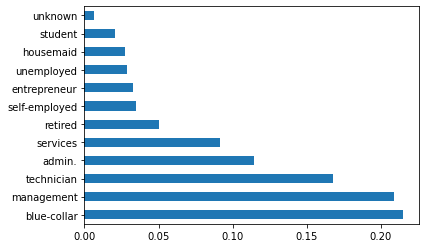

In [14]:
data.Job.value_counts(normalize=True)
#plot the bar graph of percentage job categories
data.Job.value_counts(normalize=True).plot.barh()
plt.show()

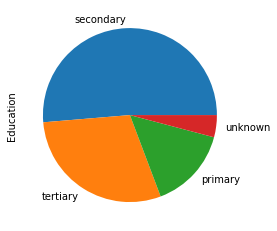

In [15]:
#categotical - Univariate analysis
data.Education.value_counts(normalize = True).plot.pie()
plt.show()

# BIVARIATE ANALYSIS -> numerical-categorical, cat-cat, cat-numerical

In [62]:
#numerical categorical analysis
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

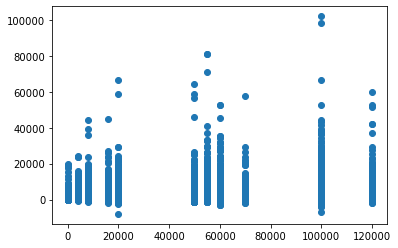

In [17]:
#bi-variate analysis is done by scatter plot, Pair plot, Corr Matrix
plt.scatter(data.salary,data.balance)
plt.show()

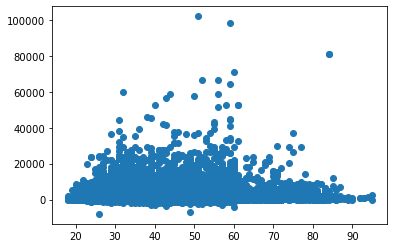

In [18]:
plt.scatter(data.age, data.balance)
plt.show()

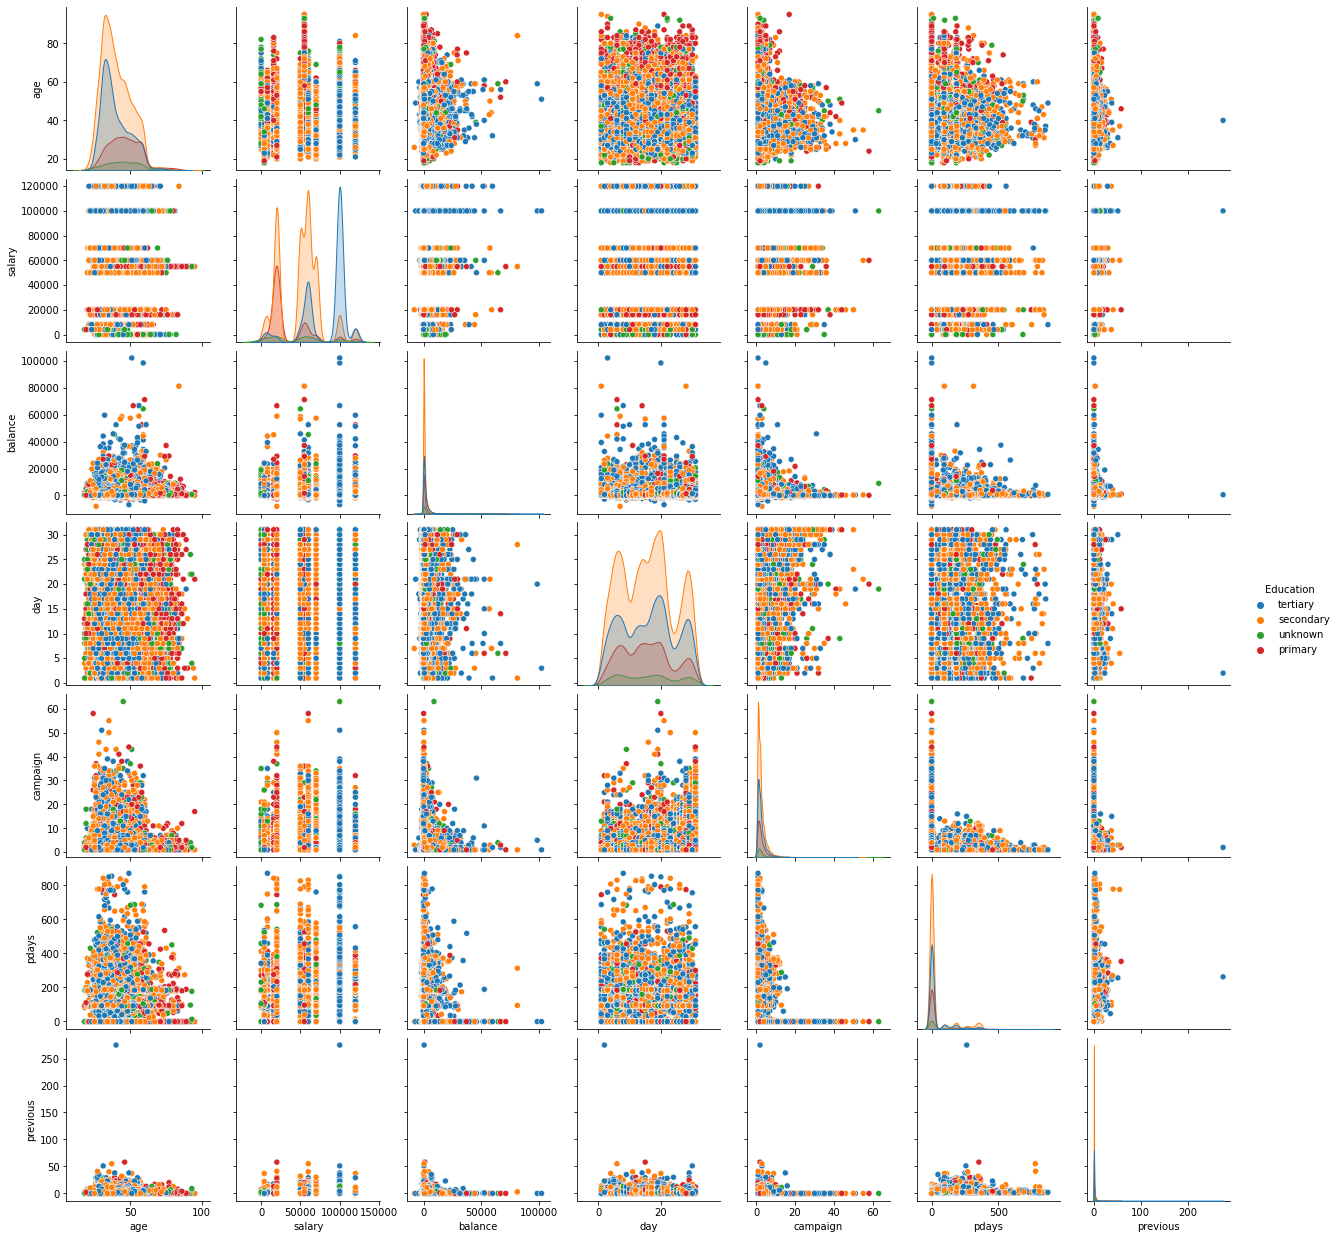

In [37]:
#Pairplot -- lets plot three columns used above using seaborn library
sb.pairplot(data = data, hue='Education')
plt.show()

In [25]:
#since we cannot see relationship b/w three variables , we use corr matrix
data[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


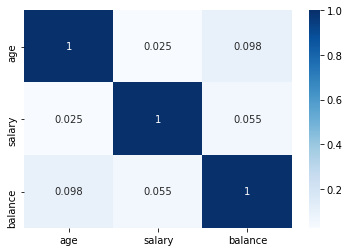

In [28]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sb.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Blues')
plt.show()

In [38]:
#analyzing one numerical and categorical value is called numerical-categorical analysis.
#we use mean,median and box plots for this
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean(),data.groupby('response')['salary'].median()
#since mean and median showed similar data lets do boxplot for same and check 

(response
 no     56769.510482
 yes    58780.510880
 Name: salary, dtype: float64,
 response
 no     60000
 yes    60000
 Name: salary, dtype: int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


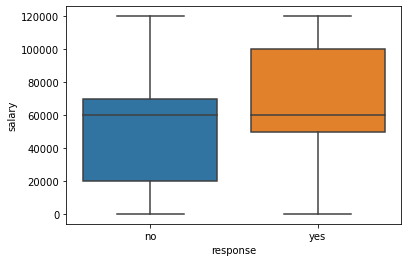

In [44]:
#plot the box plot of salary for yes & no responses.
sb.boxplot(data.response, data.salary)
plt.show()
#in the boxplt we can see customers who gave a positive response is on higher salary side..This is how numerica-cat analysis made

In [52]:
#Bivariate-Categorical Categorical analysis
'''Since our target variable/column is the Response rate, we’ll see how the different categories like Education, 
    Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ 
    we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.
'''
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
#data['response_rate'] = np.where(data.response=='yes',1,0)
data['response_rate']=data['response'].apply(lambda x:1 if x == 'yes' else 0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

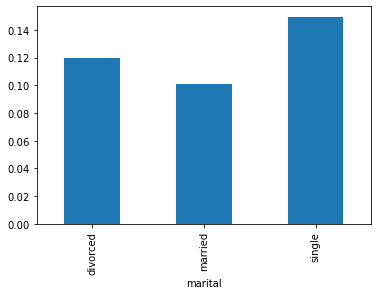

In [57]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

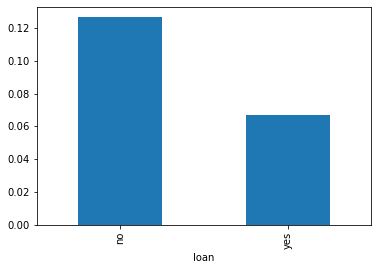

In [61]:
data.groupby('loan')['response_rate'].mean().plot.bar()
plt.show()

# MULTI VARIATE analysis

In [73]:
#more than two variables from dataset - we will see Education, Marital, Response Rate 
result = pd.pivot_table(data,index=['Education'], columns =['marital'], values='response_rate')

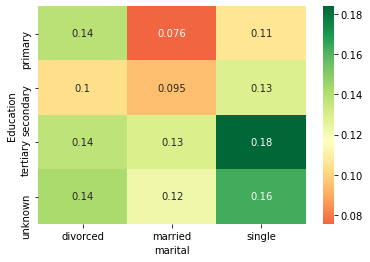

In [72]:
#create heat map of education vs marital vs response_rate
sb.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()
#based on heatmap we could see people with marital status and primary education are less
#likely to respond positive for the campaign

In [74]:
#lets do another one for jobs vs marital vs response rate
jresult = pd.pivot_table(data,index=['Job'], columns =['marital'], values='response_rate')

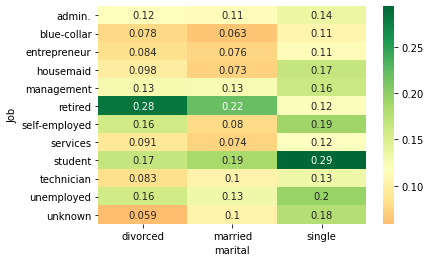

In [78]:
#create heat map of education vs marital vs response_rate
sb.heatmap(jresult, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()
#interesting to see that married blue collared job/entrpreneur/housemaid/services
#folks are less likely to respond positively for the campaign

In [ ]:
#we can do fot  Education vs poutcome vs response, etc.i am bored n tired though. 
#so not doing it for today else follow the same two lline